# Secant Method: Real-Life Applications and Implementation


### What is the Secant Method?
The **Secant Method** is a numerical technique for finding roots of equations f(x) = 0. It's an improvement over the bisection method and doesn't require the derivative like Newton's method.

### Mathematical Formula
The Secant Method uses the formula:

$$x_{n+1} = x_n - f(x_n) \cdot \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}$$

Where:
- $x_n$ and $x_{n-1}$ are the two most recent approximations
- $f(x_n)$ and $f(x_{n-1})$ are the function values at these points

In [4]:
## 2. Algorithm Implementation {#implementation}

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import Tuple, List, Callable
import warnings
warnings.filterwarnings('ignore')

def secant_method(f: Callable, x0: float, x1: float, tol: float = 1e-6, 
                  max_iter: int = 100, verbose: bool = True) -> Tuple[float, List[float], List[float]]:
    """
    Implements the Secant Method for finding roots of f(x) = 0
    
    Parameters:
    -----------
    f : function
        The function for which we want to find the root
    x0, x1 : float
        Initial guesses (two points needed)
    tol : float
        Tolerance for convergence (default: 1e-6)
    max_iter : int
        Maximum number of iterations (default: 100)
    verbose : bool
        Print iteration details (default: True)
    
    Returns:
    --------
    root : float
        The approximate root
    x_values : list
        List of x values during iteration
    errors : list
        List of absolute errors during iteration
    """
    
    x_values = [x0, x1]
    errors = [abs(f(x1))]
    
    if verbose:
        print(f"{'Iteration':<10} {'x_n':<15} {'f(x_n)':<15} {'Error':<15}")
        print("-" * 65)
        print(f"{'0':<10} {x0:<15.8f} {f(x0):<15.8f} {'-':<15}")
        print(f"{'1':<10} {x1:<15.8f} {f(x1):<15.8f} {abs(f(x1)):<15.8f}")
    
    for i in range(2, max_iter + 1):
        # Check if denominator is too small
        if abs(f(x1) - f(x0)) < 1e-15:
            print(f"Warning: f(x1) - f(x0) is too small. Method may fail.")
            break
            
        # Secant formula
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        
        # Calculate error
        error = abs(f(x2))
        x_values.append(x2)
        errors.append(error)
        
        if verbose:
            print(f"{i:<10} {x2:<15.8f} {f(x2):<15.8f} {error:<15.8f}")
        
        # Check convergence
        if error < tol:
            if verbose:
                print(f"\nConverged after {i} iterations!")
                print(f"Root: {x2:.8f}")
                print(f"f(root): {f(x2):.2e}")
            return x2, x_values, errors
        
        # Update for next iteration
        x0, x1 = x1, x2
    
    print(f"Warning: Maximum iterations ({max_iter}) reached without convergence.")
    return x2, x_values, errors

# Test the implementation with a simple example
def test_function(x):
    return x**2 - 4  # Root should be x = 2

print("=== Testing Secant Method Implementation ===")
root, x_vals, errors = secant_method(test_function, 1.0, 3.0, verbose=True)
print(f"\nActual root of x² - 4 = 0 is ±2")
print(f"Our approximation: {root:.8f}")
print(f"Verification: f({root:.8f}) = {test_function(root):.2e}")

=== Testing Secant Method Implementation ===
Iteration  x_n             f(x_n)          Error          
-----------------------------------------------------------------
0          1.00000000      -3.00000000     -              
1          3.00000000      5.00000000      5.00000000     
2          1.75000000      -0.93750000     0.93750000     
3          1.94736842      -0.20775623     0.20775623     
4          2.00355872      0.01424754      0.01424754     
5          1.99995259      -0.00018963     0.00018963     
6          1.99999996      -0.00000017     0.00000017     

Converged after 6 iterations!
Root: 1.99999996
f(root): -1.69e-07

Actual root of x² - 4 = 0 is ±2
Our approximation: 1.99999996
Verification: f(1.99999996) = -1.69e-07


## 3. Real-Life : Population Growth Model 

### Problem Statement
**Scenario:** A city's population follows a logistic growth model. The city planners need to determine when the population will reach a specific target to plan infrastructure development.

**Mathematical Model:**
The logistic growth model is given by:
$$P(t) = \frac{K}{1 + Ae^{-rt}}$$

Where:
- P(t) = population at time t
- K = carrying capacity (maximum population)
- A = constant related to initial population
- r = growth rate
- t = time in years

**Specific Problem:**
A city has:
- Current population (2023): 50,000
- Carrying capacity: 200,000
- Growth rate: 0.08 per year

**Question:** In what year will the population reach 150,000?

This requires solving: $150,000 = \frac{200,000}{1 + Ae^{-0.08t}} - 150,000 = 0$

Calculated A = 3.0000

=== Solving Population Growth Problem ===
Finding when population reaches 150,000
Current population (t=0): 50,000
Carrying capacity: 200,000
Growth rate: 0.08
Iteration  x_n             f(x_n)          Error          
-----------------------------------------------------------------
0          5.00000000      -83576.00538487 -              
1          15.00000000     -44934.95252303 44934.95252303 
2          26.62881164     -2551.21635092  2551.21635092  
3          27.32878802     -410.67480092   410.67480092   
4          27.46308238     -6.67479355     6.67479355     
5          27.46530116     -0.01815652     0.01815652     
6          27.46530722     -0.00000081     0.00000081     

Converged after 6 iterations!
Root: 27.46530722
f(root): -8.08e-07

 RESULTS:
Time needed: 27.47 years
Target year: 2050
Verification - Population in 2050: 150,000


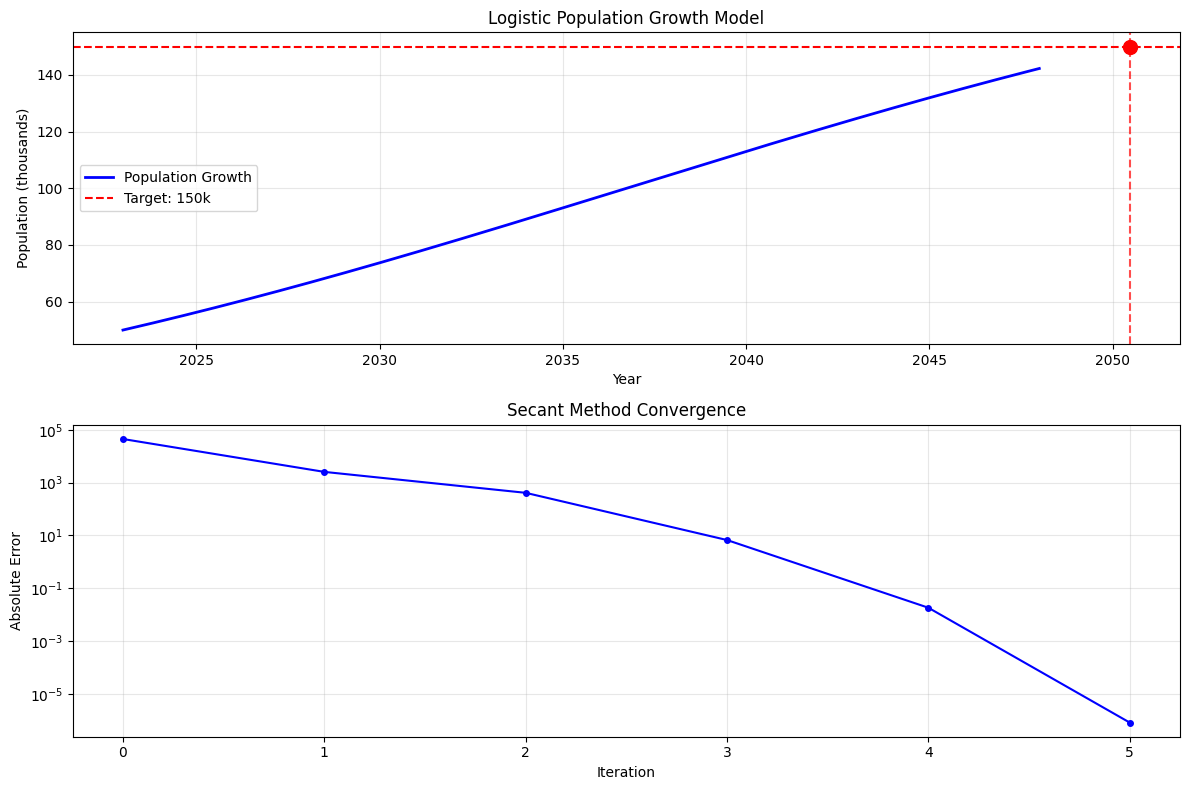


 Population Projection Table:
 Year  Population  Growth Rate (%)
 2023       50000         0.000000
 2025       56236        12.472296
 2027       62923        11.892105
 2029       70019        11.276521
 2031       77463        10.630749
 2033       85179         9.961315
 2035       93080         9.275851
 2037      101069         8.582772
 2039      109044         7.890875
 2041      116905         7.208898


In [5]:
# Population Growth Problem Solution

# Given parameters
K = 200000  # Carrying capacity
P0 = 50000  # Current population (2023)
r = 0.08    # Growth rate
target_population = 150000

# First, we need to find A using initial conditions
# P(0) = K/(1 + A) = P0, so A = (K - P0)/P0
A = (K - P0) / P0
print(f"Calculated A = {A:.4f}")

# Define the function we want to find root for
# P(t) - target = 0
def population_equation(t):
    P_t = K / (1 + A * np.exp(-r * t))
    return P_t - target_population

# Solve using Secant Method
print("\n=== Solving Population Growth Problem ===")
print(f"Finding when population reaches {target_population:,}")
print(f"Current population (t=0): {P0:,}")
print(f"Carrying capacity: {K:,}")
print(f"Growth rate: {r}")

# Use initial guesses: t=5 and t=15 years
t_solution, t_values, errors = secant_method(population_equation, 5.0, 15.0, tol=1e-6)

# Convert to year
target_year = 2023 + t_solution
print(f"\n RESULTS:")
print(f"Time needed: {t_solution:.2f} years")
print(f"Target year: {target_year:.0f}")

# Verification
final_population = K / (1 + A * np.exp(-r * t_solution))
print(f"Verification - Population in {target_year:.0f}: {final_population:,.0f}")

# Plot the population growth curve
t_plot = np.linspace(0, 25, 1000)
P_plot = K / (1 + A * np.exp(-r * t_plot))

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t_plot + 2023, P_plot/1000, 'b-', linewidth=2, label='Population Growth')
plt.axhline(y=target_population/1000, color='r', linestyle='--', label=f'Target: {target_population/1000:.0f}k')
plt.axvline(x=target_year, color='r', linestyle='--', alpha=0.7)
plt.scatter([target_year], [target_population/1000], color='red', s=100, zorder=5)
plt.xlabel('Year')
plt.ylabel('Population (thousands)')
plt.title('Logistic Population Growth Model')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot convergence
plt.subplot(2, 1, 2)
plt.semilogy(range(len(errors)), errors, 'bo-', markersize=4)
plt.xlabel('Iteration')
plt.ylabel('Absolute Error')
plt.title('Secant Method Convergence')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create a summary table
years = np.arange(2023, 2050, 2)
times = years - 2023
populations = K / (1 + A * np.exp(-r * times))

# Calculate growth rates properly
growth_rates = np.zeros(len(populations))
for i in range(1, len(populations)):
    growth_rates[i] = (populations[i] - populations[i-1]) / populations[i-1] * 100

df_population = pd.DataFrame({
    'Year': years,
    'Population': populations.astype(int),
    'Growth Rate (%)': growth_rates
})

print("\n Population Projection Table:")
print(df_population.head(10).to_string(index=False))